## Support Vector Classifier Implementation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
## lets create synthetic data points
from sklearn.datasets import make_classification

In [3]:
X,y = make_classification(n_samples=1000,n_features=2,n_classes=2,
                          n_clusters_per_class=1,n_redundant=0,random_state=15)

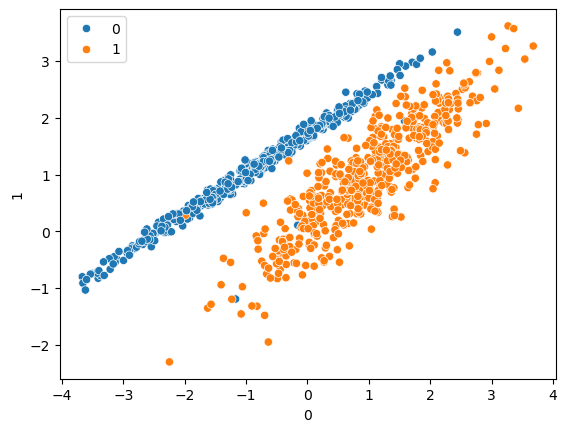

In [4]:
x =pd.DataFrame(X)[0]
yy =pd.DataFrame(X)[1]
sns.scatterplot(x=x,y=yy,hue=y)
plt.show()

In [5]:
from sklearn.svm import SVC

In [6]:
svc = SVC()
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [7]:
svc.fit(X_train,y_train)

SVC()

In [8]:
y_pred = svc.predict(X_test)

In [9]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import math
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = math.sqrt(mse)
score = r2_score(y_test,y_pred)

In [10]:
print(mae)
print(mse)
print(rmse)
print(score)

0.012
0.012
0.10954451150103323
0.9517498713329903


In [11]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [12]:
accuracy = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print(accuracy)
print(cm)
print(classification_report(y_test,y_pred))

0.988
[[132   2]
 [  1 115]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       134
           1       0.98      0.99      0.99       116

    accuracy                           0.99       250
   macro avg       0.99      0.99      0.99       250
weighted avg       0.99      0.99      0.99       250



## Hyperparameter Tunning

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedGroupKFold
kfold = StratifiedGroupKFold()
param_grid = {
    'C': [0.1,1,10,100,1000],
    'gamma':[1,0.1,0.01,0.001,0.0001],
    'kernel':['rbf']
}

In [14]:
cv = GridSearchCV(estimator=svc,param_grid=param_grid,refit=True,scoring='accuracy',cv=5,verbose=3)

In [15]:
cv.fit(X_train,y_train)
y_pred1 = cv.predict(X_test)
print("X shape:", X.shape)
print("y shape:", y.shape)
print("Class distribution:", np.bincount(y))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.987 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.980 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.987 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.993 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.980 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.987 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.980 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.987 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.993 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.987 total time=   0.0s


[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.920 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.893 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.887 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.900 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.920 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.513 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.513 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.507 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.507 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.507 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.513 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.513 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma

In [16]:
cv.best_estimator_

SVC(C=10, gamma=0.1)

In [17]:
cv.best_score_

0.9959999999999999

In [18]:
accuracy = accuracy_score(y_test,y_pred1)
cm = confusion_matrix(y_test,y_pred1)
print(accuracy)
print(cm)
print(classification_report(y_test,y_pred1))

0.992
[[132   2]
 [  0 116]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       134
           1       0.98      1.00      0.99       116

    accuracy                           0.99       250
   macro avg       0.99      0.99      0.99       250
weighted avg       0.99      0.99      0.99       250



In [19]:
cv.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

## SVM Kernels Indepth Intuition and Practical Explanation

In [20]:
x = np.linspace(-5.0,5.0,100)
y = np.sqrt(10**2-x**2)
y = np.hstack([y,-y])
x = np.hstack([x,-x])

In [21]:
x1 = np.linspace(-5.0,5.0,100)
y1 = np.sqrt(5**2 - x1**2)
y1 = np.hstack([y1,-y1])
x1 = np.hstack([x1,-x1])

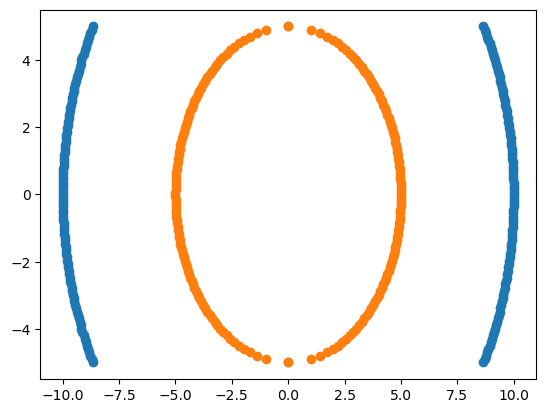

In [22]:
plt.scatter(y,x)
plt.scatter(y1,x1)
plt.show()

In [23]:
df1 = pd.DataFrame(np.vstack([y,x]).T,columns=['X1','X2']) ## here np.vstack([y,x]).T means we are transposing 
# the value that we get from np.vstack([y,x])
df1['Y'] = 0
df2 = pd.DataFrame(np.vstack([y1,x1]).T,columns=['X1','X2'])
df2['Y'] = 1
## df = df1.append(df2) ## The append method is deprecated in recent versions of pandas. 
## It's better to use pd.concat like this
df = pd.concat([df1, df2], ignore_index=True)
df.head(5)

,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


In [24]:
X = df.iloc[:,:2]
y = df.Y

In [25]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: Y, Length: 400, dtype: int64

## Polynomial Kernel

### K(x,y)=(x.y+c)d
### x,y are input vectors
### c is a free coefficient (also called coef0 in scikit-learn)
### d is the degree of the polynomial kernel

In [26]:
## We need to find components dor the Polynomial Function kernel
df['X1_Square'] = df['X1']**2
df['X2_Square'] = df['X2']**2
df['X1*X2'] = (df['X1']*df['X2'])
df.head()

,X1,X2,Y,X1_Square,X2_Square,X1*X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)

In [28]:
import plotly.express as px 
fig = px.scatter_3d(df,x='X1',y='X2',z='X1*X2',color='Y')
fig.show()

In [29]:
fig = px.scatter_3d(df,x='X1_Square',y='X2_Square',z='X1*X2',color='Y')
fig.show()

In [30]:
from sklearn.svm import SVC

In [31]:
classifier = SVC(kernel='linear')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test,y_pred)

0.4375

In [32]:
classifier = SVC(kernel='poly')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test,y_pred)

0.4875

In [33]:
classifier = SVC(kernel='rbf')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test,y_pred)

1.0

In [34]:
classifier = SVC(kernel='sigmoid')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test,y_pred)

0.5875

# Support Vector Regression Implementation

In [35]:
df = sns.load_dataset('tips')

In [36]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [38]:
## independent and dependent features
X = df[['tip', 'sex', 'smoker', 'day', 'time', 'size']]
y = df['total_bill']

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=15)

In [40]:
## Feature encoding 
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()


In [41]:
X_train['smoker']=le1.fit_transform(X_train['smoker'])
X_train['sex'] = le2.fit_transform(X_train['sex'])
X_train['time'] = le3.fit_transform(X_train['time'])

In [42]:
X_test['smoker']=le1.transform(X_test['smoker'])
X_test['sex'] = le2.transform(X_test['sex'])
X_test['time'] = le3.transform(X_test['time'])

In [43]:
## One HOt Encoding 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [44]:
ct = ColumnTransformer(transformers=[('onehot',OneHotEncoder(drop='first'),[3])]
                                    ,remainder='passthrough')

In [45]:
import sys
np.set_printoptions(threshold=sys.maxsize)
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

In [46]:
## SVR- Support Vector Regression
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)

In [47]:
from sklearn.metrics import mean_absolute_error,r2_score
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.5230013799531177
3.8075880694296416


In [48]:
## Hyperparameter tuning using GridSearch cv
param_grid = {
    'C': [0.1,1,10,100,1000],
    'gamma':[1,0.1,0.01,0.001,0.0001],
    'kernel':['rbf']
}

In [49]:
cv = GridSearchCV(svr,param_grid=param_grid,refit=True,verbose=3)

In [50]:
cv.fit(X_train,y_train)
y_pred2 = cv.predict(X_test)
print(r2_score(y_test,y_pred2))
print(mean_absolute_error(y_test,y_pred2))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.032 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.222 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.026 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.030 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.125 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.133 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.098 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.144 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.128 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.014 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.038 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;

In [51]:
cv.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}